In [ ]:
# Importing important libraries

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import h5py
import cv2
from sklearn.metrics import precision_score, recall_score

# KNN without SIFT

In [ ]:
class KNN_Sol:
  def __init__(self, filepath, low_k, high_k):
    # Reading and storing data inside train and test variables for features and target
    self.x_train, self.y_train, self.x_test, self.y_test = self.read_data(filepath)

    # Scaling the data for features for train and test variables
    self.x_train = self.scale_data(self.x_train)
    self.x_test = self.scale_data(self.x_test)

    # Storing cross validation scores according to k values inside dictionary
    self.k_scores = self.cross_val_diff_k(low_k, high_k, self.x_train, self.y_train)

    # Storing optimal k value according to best accuracy score
    self.opt_k = max(self.k_scores, key = self.k_scores.get)

    # Plot accuracy chart according to stored k scores
    self.plot_acc_chart(self.k_scores, low_k, high_k)

    # Training classifier with most optimal k value
    self.knn_clf = self.train_classifier(self.opt_k, self.x_train, self.y_train)

    # Testing the classifier on test data
    self.y_pred = self.test_classifier(self.knn_clf, self.x_test, self.y_test)

    # Plotting confusion matrix
    self.plot_confusion_matrix(self.y_test, self.y_pred)

    # Plotting classification report
    self.plot_classification_report(self.y_test, self.y_pred)

    # Printing precision and recall score
    self.precision_recall(self.y_test, self.y_pred)

  # Reading data

  def read_data(self, filepath: str):
    with h5py.File('/content/usps.h5', 'r') as f:
      x_train = f['/train/data'][:]
      y_train = f['/train/target'][:]
      x_test = f['/test/data'][:]
      y_test = f['/test/target'][:]

    print(f"No. of records in train dataset: {len(x_train)}")
    print(f"No. of records in test dataset: {len(x_test)}")
    return x_train, y_train, x_test, y_test

  #Scaling the data
  def scale_data(self, data):
    data.reshape(data.shape[0], -1) / 255.0
    return data

  # Task 1: Crosss Validation results
  # Task 4: Different k for KNN
  # Putting cross-validation into work
  def cross_val_diff_k(self, low_k, high_k, x_data, y_data) -> dict():

    k_scores = dict()
    for k in range(low_k, high_k):
      knn = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
      k_score = cross_val_score(knn, x_data, y_data, cv = 10, scoring = 'accuracy')
      k_scores[k] = k_score.mean()

    return k_scores

  # Plotting accuracy chart
  def plot_acc_chart(self, k_scores, low_k, high_k):
    plt.figure(figsize=(12, 6))
    plt.plot(range(low_k, high_k), k_scores.values(), linestyle="solid", marker='o',markersize=8)
    plt.title('Accuracy Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Accuracy')
    plt.show()

  # Training the model
  def train_classifier(self, k, x_data, y_data):
    knn = KNeighborsClassifier(metric="euclidean", n_neighbors=k)
    knn.fit(x_data, y_data)

    return knn

  # Testing the classifier
  def test_classifier(self, model, x_data, y_data):
    y_pred = model.predict(x_data)
    acc = accuracy_score(y_data,y_pred)
    print(f'Accuracy Score of the Model: {acc}')
    return y_pred

  # Task 2: Confusion Matrix
  # Plotting confusion matrix
  def plot_confusion_matrix(self, y_data, y_pred):
    print("\n \n")
    cm = confusion_matrix(y_data, y_pred)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels = np.arange(0, 10), yticklabels = np.arange(0, 10))
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

  # Plotting classification report
  def plot_classification_report(self, y_data, y_pred):
    print("\n \n")
    report = classification_report(y_data, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()

    fig, ax = plt.subplots(figsize=(15, 8))
    ax = sns.heatmap(df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Labels')
    ax.set_title('Classification Report')
    plt.show()

  # Task 3: Precision and Recall
  # Precision and Recall Score
  def precision_recall(self, y_data, y_pred):
    print("\n \n")
    print(f"Precision Score is: {precision_score(y_data, y_pred, average = 'weighted')}")
    print(f"Recall Score is: {recall_score(y_data, y_pred, average = 'weighted')}")

No. of records in train dataset: 7291
No. of records in test dataset: 2007


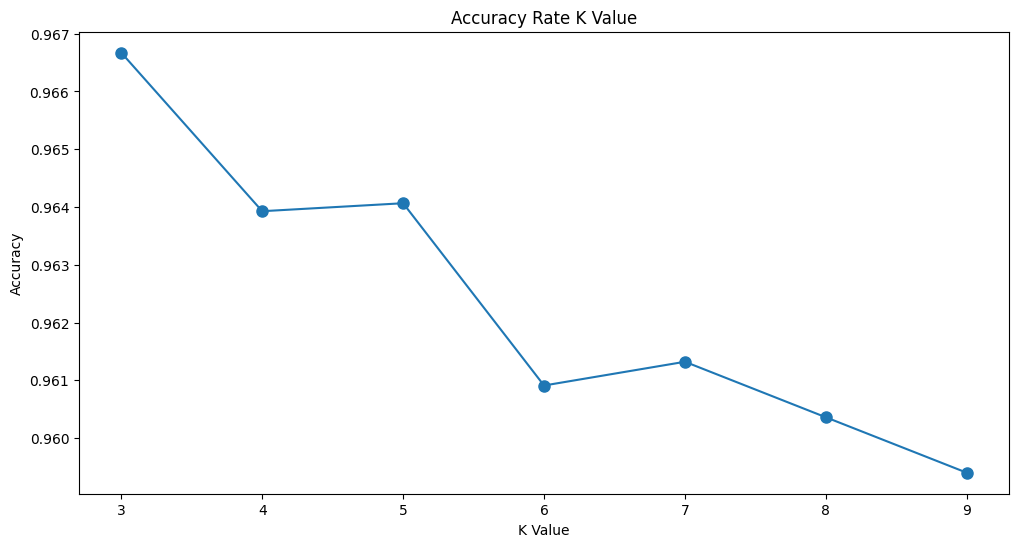

Accuracy Score of the Model: 0.9446935724962631

 



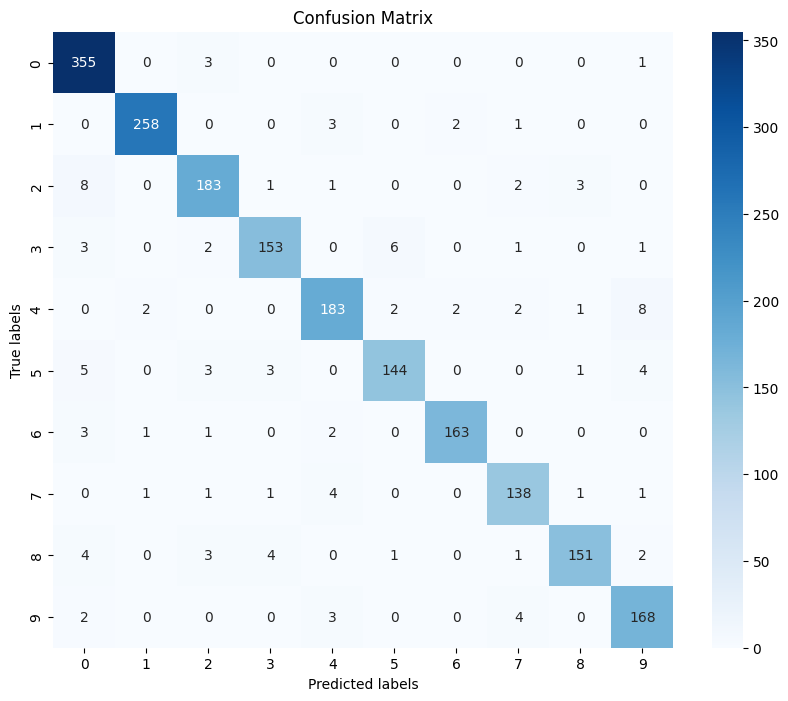

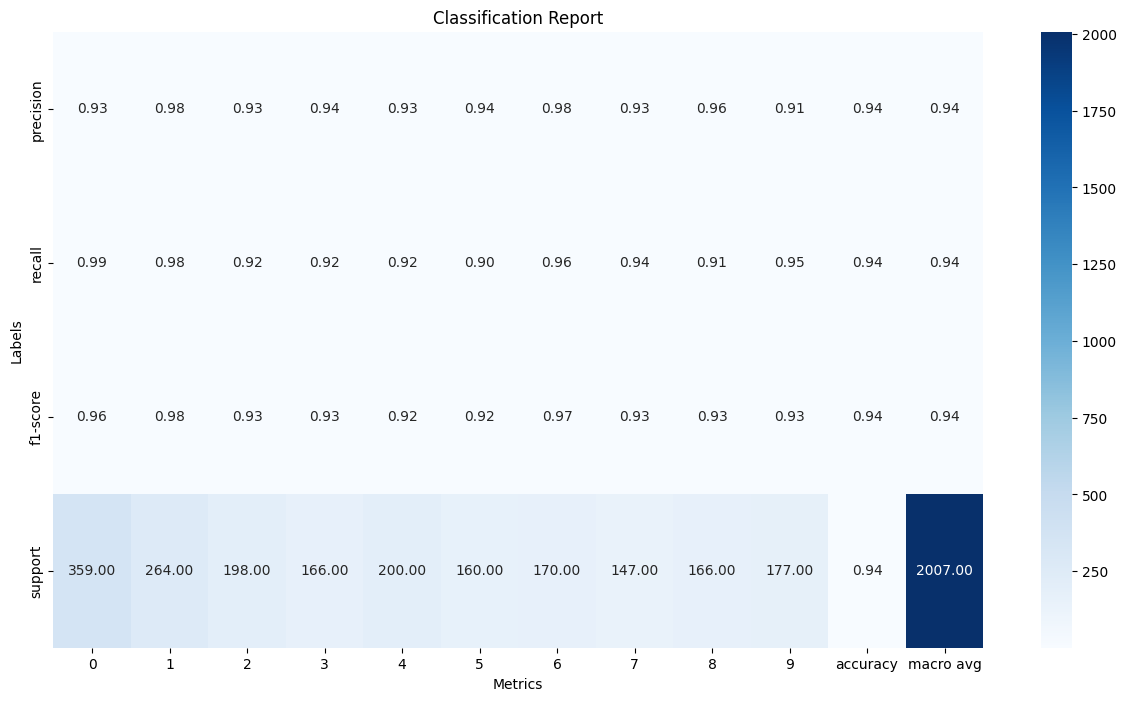


 

Precision Score is: 0.9450852413025813
Recall Score is: 0.9446935724962631


In [ ]:
sol = KNN_Sol("usps.h5", 3, 10)